# Decision Trees and Random Forests

In [10]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# read in data

df = pd.read_csv('Data/water-features.csv')

In [12]:
# look at data

df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [14]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Exploratory Data Analysis

C:\Users\maxma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


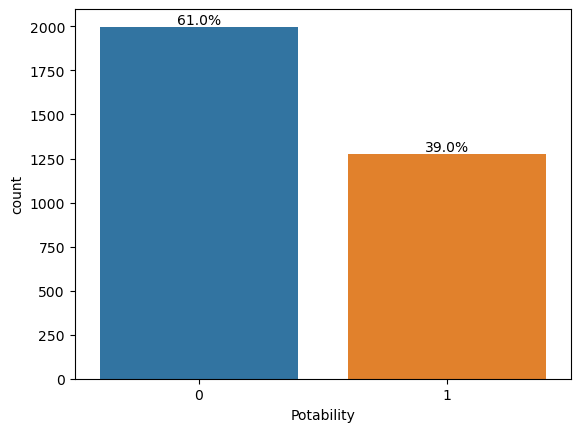

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(df['Potability'])

# calculate percents
total = len(df['Potability'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [16]:
# create a balanced data set 

import pandas as pd
from sklearn.utils import resample

# Assuming your original dataset is stored in a DataFrame called 'df'
# Separate majority and minority classes
majority_class = df[df['Potability'] == 0]  # Replace 'target' with the name of your target column
minority_class = df[df['Potability'] == 1]


# Undersample majority class
undersampled_majority = resample(majority_class,
                                 replace=False,  # Set to False to perform undersampling without replacement
                                 n_samples=len(minority_class),  # Set the number of samples to match the minority class
                                 random_state=42)  # Set a random state for reproducibility

# Combine undersampled majority class with the minority class
balanced_df = pd.concat([undersampled_majority, minority_class])

# Shuffle the dataset to randomize the order
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

C:\Users\maxma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


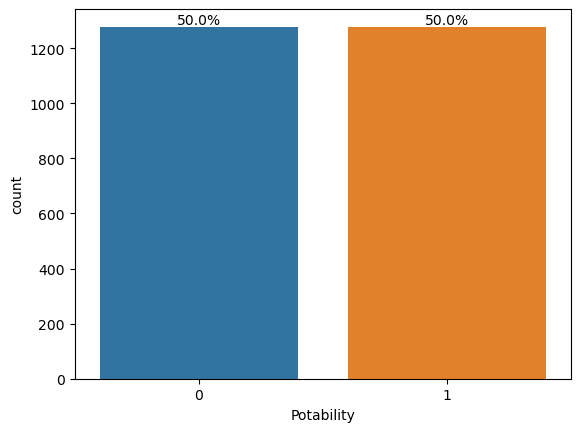

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(balanced_df['Potability'])

# calculate percents
total = len(balanced_df['Potability'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [62]:
size = len(df)
bsize = len(balanced_df)
decrease = size - bsize
print(decrease/size)

0.21978021978021978


In [18]:
balanced_df.count()

ph                 2184
Hardness           2556
Solids             2556
Chloramines        2556
Sulfate            1947
Conductivity       2556
Organic_carbon     2556
Trihalomethanes    2427
Turbidity          2556
Potability         2556
dtype: int64

In [19]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

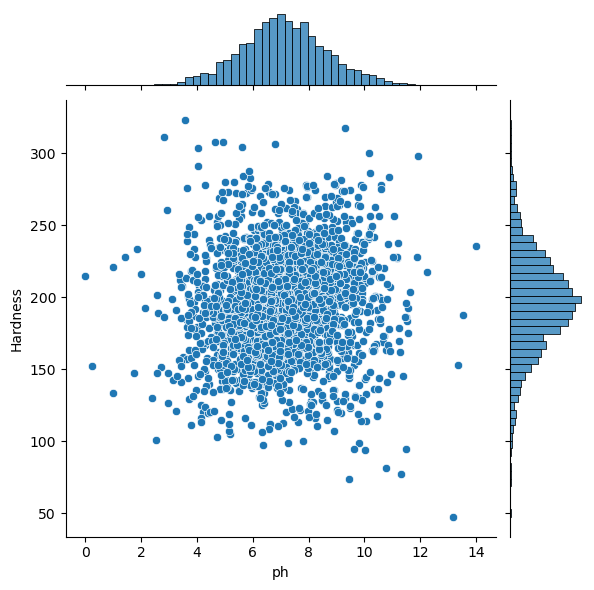

In [20]:
sns.jointplot(x='ph',y='Hardness',data=df)

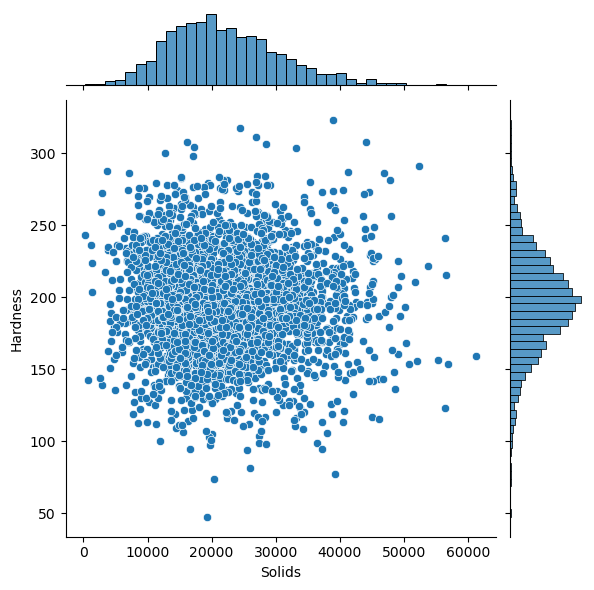

In [21]:
sns.jointplot(x='Solids',y='Hardness',data=df)

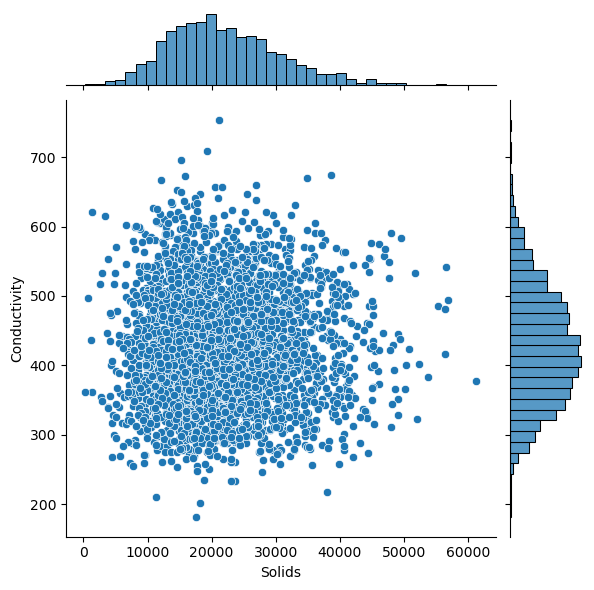

In [22]:
sns.jointplot(x='Solids',y='Conductivity',data=df)

<Figure size 1000x800 with 0 Axes>

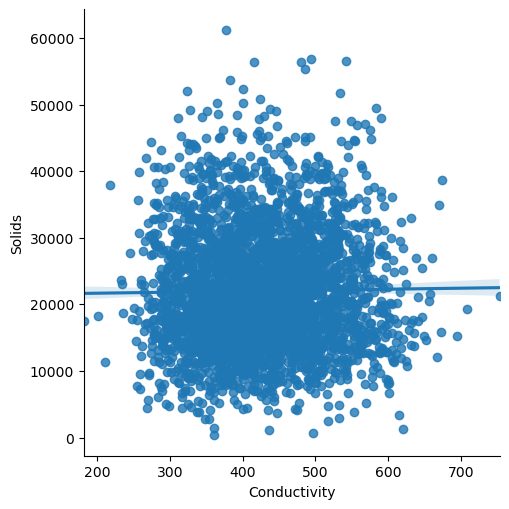

In [23]:
plt.figure(figsize=(10,8))
sns.lmplot(y='Solids',x='Conductivity',data=df,palette='Set1')

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

# Preparing our Data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [25]:
# all variables are numerical so no need to convert any data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [27]:
# We have quite a few missing values so let's replace them
# mean, median, mode value imputation 

df_mean = df.apply(lambda x: x.fillna(x.mean()))
df_median = df.apply(lambda x: x.fillna(x.median()))
df_mode = df.apply(lambda x: x.fillna(x.mode()))

In [28]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [29]:
df_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [30]:
df_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3211 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3078 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3269 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [31]:
# Now there are no missing values so we can proceed

# MEAN IMPUTATION

## Train Test Split (mean)

In [32]:
# import model and Train Test Split
from sklearn.model_selection import train_test_split
X = df_mean.drop('Potability',axis=1)
y = df_mean['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Decision Tree Model (mean)

In [33]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# create instance of DecisionTreeClassifier()
dtree = DecisionTreeClassifier()

# fit to training data
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predict and Evaluate Decision Tree (mean imputation)

In [34]:
# store predictions and print classification report
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68       603
           1       0.49      0.51      0.50       380

    accuracy                           0.61       983
   macro avg       0.59      0.59      0.59       983
weighted avg       0.61      0.61      0.61       983



In [35]:
print(confusion_matrix(y_test,predictions))

[[404 199]
 [187 193]]


## Random Forests (mean imputation)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predict and Evaluate Random Forests (mean imputation)

In [37]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       603
           1       0.69      0.35      0.46       380

    accuracy                           0.69       983
   macro avg       0.69      0.62      0.62       983
weighted avg       0.69      0.69      0.66       983



# MEDIAN IMPUTATION

## Train Test Split  (median imputation)

In [38]:
# replace na values
df_median = df.apply(lambda x: x.fillna(x.median()))

In [39]:
df_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [40]:
# all values are non-null

In [41]:
# import model and Train Test Split
from sklearn.model_selection import train_test_split
X = df_median.drop('Potability',axis=1)
y = df_median['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Decision Tree Model (median imputation)

In [42]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# create instance of DecisionTreeClassifier()
dtree = DecisionTreeClassifier()

# fit to training data
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predict and Evaluate Decision Tree (median imputation)

In [43]:
# store predictions and print classification report
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       603
           1       0.48      0.50      0.49       380

    accuracy                           0.59       983
   macro avg       0.58      0.58      0.58       983
weighted avg       0.60      0.59      0.60       983



In [44]:
print(confusion_matrix(y_test,predictions))

[[394 209]
 [190 190]]


# 

# Random Forests (median imputation)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [46]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       603
           1       0.70      0.36      0.47       380

    accuracy                           0.69       983
   macro avg       0.69      0.63      0.63       983
weighted avg       0.69      0.69      0.66       983



In [47]:
print(confusion_matrix(y_test,predictions))

[[544  59]
 [244 136]]


In [48]:
df_mode = df.apply(lambda x: x.fillna(x.mode()))

In [49]:
df_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3211 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3078 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3269 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


After assessing the models based on the weighted average f-1 score, we can see that the decision tree (median imputation) performs best. We will now take a look at which features are most predictive of potable water


In [50]:
# also add a portion where you adjust n hyperparameter and and assess the f-1 score

In [51]:
winning_model = rfc

In [52]:
# Assessing feature importance

In [53]:
# Extract feature columns from median imputed dataframe
feature_columns = df_median.columns[:-1]  # Exclude the target variable "Potability"

# Split median imputed df into features (X) and target variable (y)
X = df_median[feature_columns]
y = df_median['Potability']

# Fit the classifier to the data
rfc.fit(X, y)

# Get feature importances
importances = rfc.feature_importances_

# Print feature importances
for feature, importance in zip(feature_columns, importances):
    print(f"{feature}: {importance}")

ph: 0.12764260569351832
Hardness: 0.1241673843937713
Solids: 0.11463417449445819
Chloramines: 0.11482976562981767
Sulfate: 0.12628324432699933
Conductivity: 0.1002668217164088
Organic_carbon: 0.09873071641079294
Trihalomethanes: 0.09789254182616529
Turbidity: 0.09555274550806814


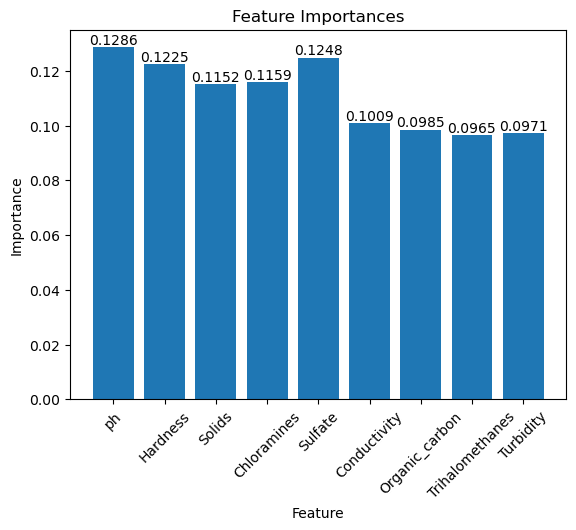

In [54]:
import matplotlib.pyplot as plt

# Define the feature names and importances
feature_names = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
importances = [0.128557076164589, 0.12248920772480662, 0.11517304982682222, 0.11590173069745693, 0.12481980277418436, 0.10090226611247037, 0.09849830207977578, 0.09653004763940212, 0.09712851698049262]

# Create a bar plot
plt.bar(feature_names, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)

# Add value overlays
for i, v in enumerate(importances):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.show()

### Reinstate the model except with balanced data

In [55]:
# replace values of df_balanced with median values

balanced_df_median = balanced_df.apply(lambda x: x.fillna(x.median()))


In [56]:
# import model and Train Test Split
from sklearn.model_selection import train_test_split
X = balanced_df_median.drop('Potability',axis=1)
y = balanced_df_median['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [58]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62       392
           1       0.61      0.64      0.62       375

    accuracy                           0.62       767
   macro avg       0.62      0.62      0.62       767
weighted avg       0.62      0.62      0.62       767

